In [365]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [366]:
df = pd.read_csv('dataset.csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


## Data preprocessing

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [368]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [369]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


### Handling Missing Values

In [370]:
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = SimpleImputer(strategy='most_frequent')

In [371]:
numeric_cols = ['Age', 'Years of Experience', 'Salary']
categorical_cols = ['Gender', 'Education Level', 'Job Title']

In [372]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [373]:
df = preprocessor.fit_transform(df)

In [374]:
all_cols = numeric_cols + categorical_cols

In [375]:
df = pd.DataFrame(df, columns=all_cols)

In [376]:
df.isnull().sum()

Age                    0
Years of Experience    0
Salary                 0
Gender                 0
Education Level        0
Job Title              0
dtype: int64

### Encode categorical variables

In [377]:
from sklearn.preprocessing import OneHotEncoder

In [378]:
numeric_cols = ['Age', 'Years of Experience', 'Salary']
categorical_cols = ['Gender', 'Education Level', 'Job Title']

In [379]:
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

In [380]:
df_transformed = column_transformer.fit_transform(df)

In [381]:
df_transformed

array([[1.0, 0.0, 0.0, ..., 32.0, 5.0, 90000.0],
       [0.0, 0.0, 0.0, ..., 28.0, 3.0, 65000.0],
       [1.0, 0.0, 0.0, ..., 45.0, 15.0, 150000.0],
       ...,
       [0.0, 0.0, 1.0, ..., 30.0, 4.0, 55000.0],
       [1.0, 0.0, 0.0, ..., 46.0, 14.0, 140000.0],
       [0.0, 0.0, 0.0, ..., 26.0, 1.0, 35000.0]],
      shape=(6704, 203), dtype=object)

In [382]:
features = column_transformer.get_feature_names_out()
df_transformed_df = pd.DataFrame(df_transformed, columns=features)
df_transformed_df["Salary"] = df["Salary"].values

In [383]:
df_transformed_df

,cat__Gender_Male,cat__Gender_Other,cat__Education Level_Bachelor's Degree,cat__Education Level_High School,cat__Education Level_Master's,cat__Education Level_Master's Degree,cat__Education Level_PhD,cat__Education Level_phD,cat__Job Title_Accountant,cat__Job Title_Administrative Assistant,...,cat__Job Title_Training Specialist,cat__Job Title_UX Designer,cat__Job Title_UX Researcher,cat__Job Title_VP of Finance,cat__Job Title_VP of Operations,cat__Job Title_Web Developer,remainder__Age,remainder__Years of Experience,remainder__Salary,Salary
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,32.0,5.0,90000.0,90000.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,28.0,3.0,65000.0,65000.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,45.0,15.0,150000.0,150000.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,36.0,7.0,60000.0,60000.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,52.0,20.0,200000.0,200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6699,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,49.0,20.0,200000.0,200000.0
6700,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,32.0,3.0,50000.0,50000.0
6701,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,30.0,4.0,55000.0,55000.0
6702,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,46.0,14.0,140000.0,140000.0


### apply PCA to perform dimensionality reduction

In [260]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [261]:
x = df_transformed_df.drop("Salary", axis=1)
y = df_transformed_df["Salary"]

In [262]:
scaler = StandardScaler()

In [263]:
# step1 - standardize the data
df_transformed_df.iloc[:, 0:207] = scaler.fit_transform(df_transformed_df.iloc[:, 0:207])

In [264]:
# apply PCA
pca = PCA(n_components=50)

In [265]:
x_pca = pca.fit_transform(x)

## Train/Test split and model training

### Train test split

In [384]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [267]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

### try LinearRegression

In [268]:
lr = LinearRegression()

In [269]:
lr.fit(x_train, y_train)

LinearRegression()

In [270]:
y_pred = lr.predict(x_test)

In [271]:
r2_score(y_test, y_pred)

1.0

### try Polynomial regression

In [385]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [386]:
x_poly = poly.fit_transform(df_transformed_df.iloc[:, 0:204])

In [387]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_poly)

In [354]:
r2_scores = []

for n in range(10, 61):
    pca = PCA(n_components=n)
    x_pca = pca.fit_transform(x_scaled)

    x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    r2 = r2_score(y_test, y_pred)
    r2_scores.append((n, r2))

for n, score in r2_scores:
    print(f"Components: {n}, R² Score: {score:.4f}")

Components: 10, R² Score: 0.8410
Components: 11, R² Score: 0.8380
Components: 12, R² Score: 0.8150
Components: 13, R² Score: 0.8535
Components: 14, R² Score: 0.8360
Components: 15, R² Score: 0.8519
Components: 16, R² Score: 0.8361
Components: 17, R² Score: 0.8168
Components: 18, R² Score: 0.8464
Components: 19, R² Score: 0.8259
Components: 20, R² Score: 0.8122
Components: 21, R² Score: 0.8187
Components: 22, R² Score: 0.8297
Components: 23, R² Score: 0.8378
Components: 24, R² Score: 0.8221
Components: 25, R² Score: 0.8136
Components: 26, R² Score: 0.8409
Components: 27, R² Score: 0.8409
Components: 28, R² Score: 0.8236
Components: 29, R² Score: 0.8486
Components: 30, R² Score: 0.7828
Components: 31, R² Score: 0.8011
Components: 32, R² Score: 0.7982
Components: 33, R² Score: 0.8403
Components: 34, R² Score: 0.8240
Components: 35, R² Score: 0.8064
Components: 36, R² Score: 0.8122
Components: 37, R² Score: 0.8410
Components: 38, R² Score: 0.8511
Components: 39, R² Score: 0.7263
Components

In [388]:
best_n, best_r2 = max(r2_scores, key=lambda x: x[1])
best_n, best_r2

(42, 0.8687361378993878)

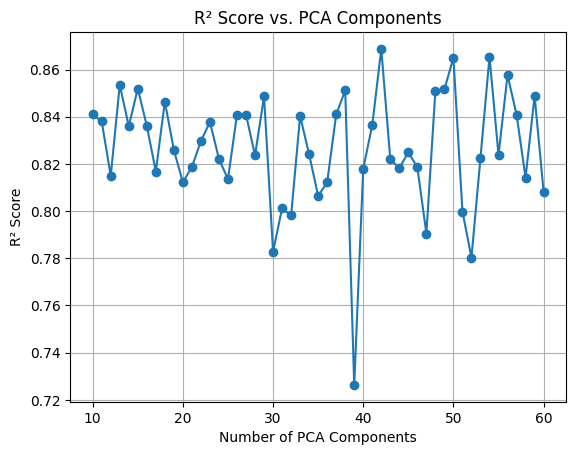

In [355]:
components, scores = zip(*r2_scores)
plt.plot(components, scores, marker='o')
plt.xlabel("Number of PCA Components")
plt.ylabel("R² Score")
plt.title("R² Score vs. PCA Components")
plt.grid(True)
plt.show()

In [389]:
pca = PCA(n_components=best_n)
x_pca_best = pca.fit_transform(x_scaled)

In [390]:
x_train, x_test, y_train, y_test = train_test_split(x_pca_best, y, test_size=0.2, random_state=42)

In [391]:
model = LinearRegression()

In [392]:
model.fit(x_train, y_train)

LinearRegression()

In [393]:
y_pred = model.predict(x_test)

In [394]:
r2_score(y_test, y_pred)

0.8249675781821795